### Natural Language Processing with Disaster Tweets
Predict which Tweets are about real disasters and which ones are not

https://www.kaggle.com/competitions/nlp-getting-started/data

a


In [138]:
import pandas as pd
#settings :
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

import numpy as np
import matplotlib.pyplot as plt # library of vizualization
import seaborn as sns # library of vizualization
import missingno as msno

train = pd.read_csv("train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [139]:
train.shape

(7613, 5)

In [140]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Really not much to see here... But that is part of why I was interested in this challenge. I want to see what I can come up with as further extensions (feature engineering) for this dataset and this ties in neatly to the NLP course we have just begun with Jussi as well

In [141]:
# I think I will need spacy to make this a bit more complex...
import spacy
import re
nlp = spacy.load("en_core_web_sm")


## Feature Engineering

### Let's extract hashtags?

In [142]:
# function to find the hashtags in text

def find_tags(text):
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags if hashtags else pd.NA # return hashtags if there are any. if not, use pd.NA

In [143]:
train['hashtags'] = train['text'].apply(find_tags)
train.head

<bound method NDFrame.head of          id keyword location                                                                                                                                       text  target             hashtags
0         1     NaN      NaN                                                                      Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all       1         [earthquake]
1         4     NaN      NaN                                                                                                     Forest fire near La Ronge Sask. Canada       1                 <NA>
2         5     NaN      NaN      All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected       1                 <NA>
3         6     NaN      NaN                                                                          13,000 people receive #wildfires evacuation orders in California        1       

### We can also extract whether there is a link in the tweet

In [144]:
def find_links(text):
    links = re.findall(r'http://(\S+)', text)
    return links if links else pd.NA  # return links if there are any. if not, use pd.NA

train['links'] = train['text'].apply(find_links)
data.head

<bound method NDFrame.head of          id keyword location                                                                                                                                       text  target             hashtags  links  mentions  text_length  PRON  NOUN  AUX  DET  PROPN  ADP  SYM  VERB  PUNCT  PART  ADJ  CCONJ  NUM  ADV    X  SCONJ  INTJ  SPACE  hashtag_count
0         1     NaN      NaN                                                                      Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all       1         [earthquake]      0         0           69   4.0   2.0  2.0  1.0    2.0  1.0  1.0   1.0    NaN   NaN  NaN    NaN  NaN  NaN  NaN    NaN   NaN    NaN              1
1         4     NaN      NaN                                                                                                     Forest fire near La Ronge Sask. Canada       1                 <NA>      0         0           38   NaN   2.0  NaN  NaN    4.0  1.0  NaN   NaN    1

### And mentions, or @'s as the kids call them

In [145]:
def find_mentions(text):
    mentions = re.findall(r'@(\S+)', text)
    return mentions if mentions else pd.NA  # return links if there are any. if not, use pd.NA

train['mentions'] = train['text'].apply(find_mentions)
train.head

<bound method NDFrame.head of          id keyword location                                                                                                                                       text  target             hashtags              links                    mentions
0         1     NaN      NaN                                                                      Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all       1         [earthquake]                NaN                         NaN
1         4     NaN      NaN                                                                                                     Forest fire near La Ronge Sask. Canada       1                 <NA>                NaN                         NaN
2         5     NaN      NaN      All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected       1                 <NA>                NaN                       

### We can also add the length of the tweet

In [146]:
train['text_length'] = train['text'].apply(lambda x: len(x))
train.head

<bound method NDFrame.head of          id keyword location                                                                                                                                       text  target             hashtags              links                    mentions  text_length
0         1     NaN      NaN                                                                      Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all       1         [earthquake]                NaN                         NaN           69
1         4     NaN      NaN                                                                                                     Forest fire near La Ronge Sask. Canada       1                 <NA>                NaN                         NaN           38
2         5     NaN      NaN      All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected       1                 <NA>   

#### The link or mention itself as a string is not important, the amount of them is, so let's convert

In [147]:
def turn_to_count(column_data):
    try:
        count = len(column_data)
    except:
        count = 0
    return count

train['links'] = train['links'].apply(turn_to_count)
train['mentions'] = train['mentions'].apply(turn_to_count)
data.head

<bound method NDFrame.head of          id keyword location                                                                                                                                       text  target             hashtags  links  mentions  text_length  PRON  NOUN  AUX  DET  PROPN  ADP  SYM  VERB  PUNCT  PART  ADJ  CCONJ  NUM  ADV    X  SCONJ  INTJ  SPACE  hashtag_count
0         1     NaN      NaN                                                                      Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all       1         [earthquake]      0         0           69   4.0   2.0  2.0  1.0    2.0  1.0  1.0   1.0    NaN   NaN  NaN    NaN  NaN  NaN  NaN    NaN   NaN    NaN              1
1         4     NaN      NaN                                                                                                     Forest fire near La Ronge Sask. Canada       1                 <NA>      0         0           38   NaN   2.0  NaN  NaN    4.0  1.0  NaN   NaN    1

## Spacy Stuff


### I want to to add a agregate POS count for each tweet. Not sure if this is useful, but it is more data...

In [148]:
#
def pos_tags(text):
    doc = nlp(text)
    tags = [token.pos_ for token in doc]
    return tags

tag_list = [pos_tags(text) for text in train['text']]




In [149]:
# Not sure if this is really good, but it's a quick way of counting each word type
from collections import Counter

agregate_list = []
for i in tag_list:
    agregate_list.append(Counter(i))


#convert the counter objects to python dictionary
agregate_list = [dict(counter_list) for counter_list in agregate_list]

print(agregate_list)


[{'PRON': 4, 'NOUN': 2, 'AUX': 2, 'DET': 1, 'PROPN': 2, 'ADP': 1, 'SYM': 1, 'VERB': 1}, {'NOUN': 2, 'ADP': 1, 'PROPN': 4, 'PUNCT': 1}, {'DET': 2, 'NOUN': 7, 'VERB': 4, 'PART': 1, 'PUNCT': 3, 'ADP': 3, 'AUX': 3, 'ADJ': 1, 'CCONJ': 1}, {'NUM': 1, 'NOUN': 4, 'VERB': 1, 'SYM': 1, 'ADP': 1, 'PROPN': 1}, {'ADV': 1, 'AUX': 1, 'VERB': 1, 'DET': 2, 'NOUN': 6, 'ADP': 4, 'PROPN': 2, 'SYM': 1}, {'SYM': 1, 'PROPN': 7, 'NOUN': 5, 'X': 2, 'NUM': 1, 'VERB': 2, 'ADP': 3, 'DET': 1, 'PUNCT': 1}, {'SYM': 2, 'NOUN': 7, 'ADJ': 1, 'VERB': 1, 'ADP': 2, 'PROPN': 3, 'PUNCT': 1}, {'PRON': 2, 'AUX': 2, 'ADP': 3, 'NOUN': 4, 'DET': 3, 'CCONJ': 1, 'VERB': 1, 'PUNCT': 1}, {'PRON': 1, 'VERB': 2, 'DET': 3, 'NOUN': 4, 'ADV': 1, 'ADP': 2}, {'PRON': 2, 'AUX': 2, 'ADJ': 1, 'SCONJ': 1, 'DET': 1, 'NOUN': 2, 'VERB': 1, 'ADP': 1, 'PUNCT': 1}, {'NUM': 1, 'NOUN': 3, 'VERB': 1, 'ADP': 1, 'DET': 1, 'ADV': 2}, {'PROPN': 6, 'AUX': 2, 'VERB': 5, 'ADV': 1, 'X': 1, 'DET': 1, 'ADJ': 1, 'PRON': 6, 'ADP': 1, 'NOUN': 4}, {'NOUN': 3, 'VERB'

In [150]:
# Conver list to dataframe
agregate_df = pd.DataFrame(agregate_list)

agregate_df.head

<bound method NDFrame.head of       PRON  NOUN  AUX  DET  PROPN  ADP  SYM  VERB  PUNCT  PART  ADJ  CCONJ  NUM  ADV    X  SCONJ  INTJ  SPACE
0      4.0   2.0  2.0  1.0    2.0  1.0  1.0   1.0    NaN   NaN  NaN    NaN  NaN  NaN  NaN    NaN   NaN    NaN
1      NaN   2.0  NaN  NaN    4.0  1.0  NaN   NaN    1.0   NaN  NaN    NaN  NaN  NaN  NaN    NaN   NaN    NaN
2      NaN   7.0  3.0  2.0    NaN  3.0  NaN   4.0    3.0   1.0  1.0    1.0  NaN  NaN  NaN    NaN   NaN    NaN
3      NaN   4.0  NaN  NaN    1.0  1.0  1.0   1.0    NaN   NaN  NaN    NaN  1.0  NaN  NaN    NaN   NaN    NaN
4      NaN   6.0  1.0  2.0    2.0  4.0  1.0   1.0    NaN   NaN  NaN    NaN  NaN  1.0  NaN    NaN   NaN    NaN
...    ...   ...  ...  ...    ...  ...  ...   ...    ...   ...  ...    ...  ...  ...  ...    ...   ...    ...
7608   NaN   4.0  NaN  1.0    NaN  1.0  NaN   2.0    NaN   NaN  2.0    NaN  1.0  NaN  NaN    NaN   NaN    NaN
7609   1.0   4.0  NaN  3.0    1.0  5.0  NaN   NaN    2.0   NaN  3.0    NaN  NaN  2.0  1.0 

In [151]:
agregate_df.isna().sum()

PRON     3684
NOUN      447
AUX      4169
DET      3453
PROPN    1646
ADP      1819
SYM      6042
VERB     1227
PUNCT    1904
PART     5522
ADJ      3517
CCONJ    5610
NUM      5671
ADV      4855
X        6558
SCONJ    6103
INTJ     7171
SPACE    6657
dtype: int64

### Combine dataframes

In [152]:

train = pd.concat([train, agregate_df], axis=1)
train.head()

,id,keyword,location,text,target,hashtags,links,mentions,text_length,PRON,NOUN,AUX,DET,PROPN,ADP,SYM,VERB,PUNCT,PART,ADJ,CCONJ,NUM,ADV,X,SCONJ,INTJ,SPACE
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,[earthquake],0,0,69,4.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,<NA>,0,0,38,NaN,2.0,NaN,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,<NA>,0,0,133,NaN,7.0,3.0,2.0,NaN,3.0,NaN,4.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,[wildfires],0,0,65,NaN,4.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,"[Alaska, wildfires]",0,0,88,NaN,6.0,1.0,2.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [153]:
train.drop(['SPACE'], axis=1, inplace=True)


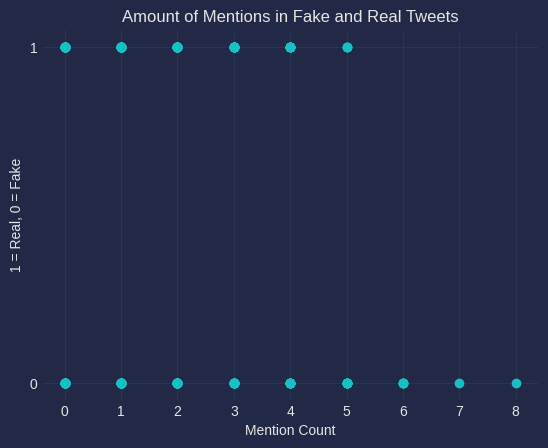

In [154]:
plt.scatter(train['mentions'], train['target'])
plt.xlabel('Mention Count')
plt.ylabel('1 = Real, 0 = Fake')
plt.title('Amount of Mentions in Fake and Real Tweets')
plt.yticks([0, 1])
plt.show()


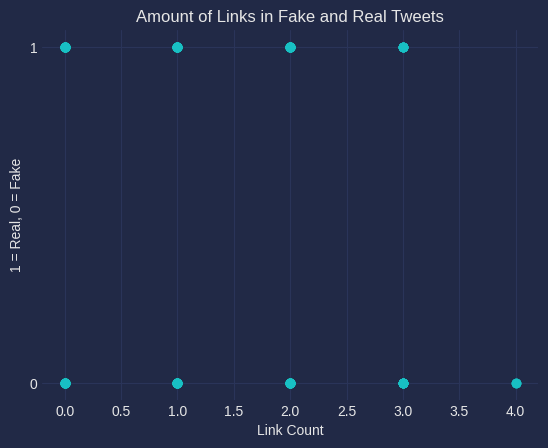

In [155]:
plt.scatter(train['links'], train['target'])
plt.xlabel('Link Count')
plt.ylabel('1 = Real, 0 = Fake')
plt.title('Amount of Links in Fake and Real Tweets')
plt.yticks([0, 1])
plt.show()


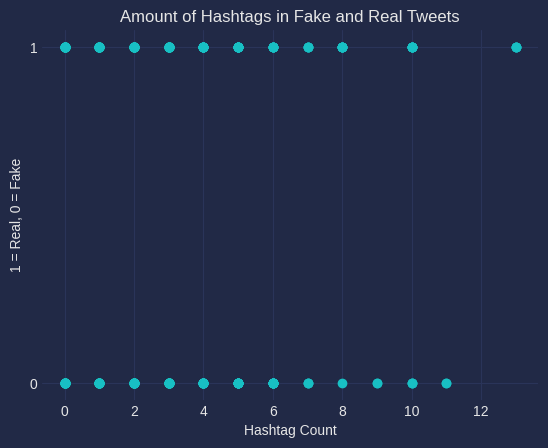

In [156]:
train['hashtag_count'] = train['hashtags'].apply(turn_to_count)


plt.scatter(train['hashtag_count'], train['target'])
plt.xlabel('Hashtag Count')
plt.ylabel('1 = Real, 0 = Fake')
plt.title('Amount of Hashtags in Fake and Real Tweets')
plt.yticks([0, 1])
plt.show()


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'links'}>,
        <Axes: title={'center': 'mentions'}>,
        <Axes: title={'center': 'text_length'}>],
       [<Axes: title={'center': 'PRON'}>,
        <Axes: title={'center': 'NOUN'}>,
        <Axes: title={'center': 'AUX'}>, <Axes: title={'center': 'DET'}>,
        <Axes: title={'center': 'PROPN'}>],
       [<Axes: title={'center': 'ADP'}>, <Axes: title={'center': 'SYM'}>,
        <Axes: title={'center': 'VERB'}>,
        <Axes: title={'center': 'PUNCT'}>,
        <Axes: title={'center': 'PART'}>],
       [<Axes: title={'center': 'ADJ'}>,
        <Axes: title={'center': 'CCONJ'}>,
        <Axes: title={'center': 'NUM'}>, <Axes: title={'center': 'ADV'}>,
        <Axes: title={'center': 'X'}>],
       [<Axes: title={'center': 'SCONJ'}>,
        <Axes: title={'center': 'INTJ'}>,
        <Axes: title={'center': 'hashtag_count'}>, <Axes: >, <Axes: >]],
      dtype=objec

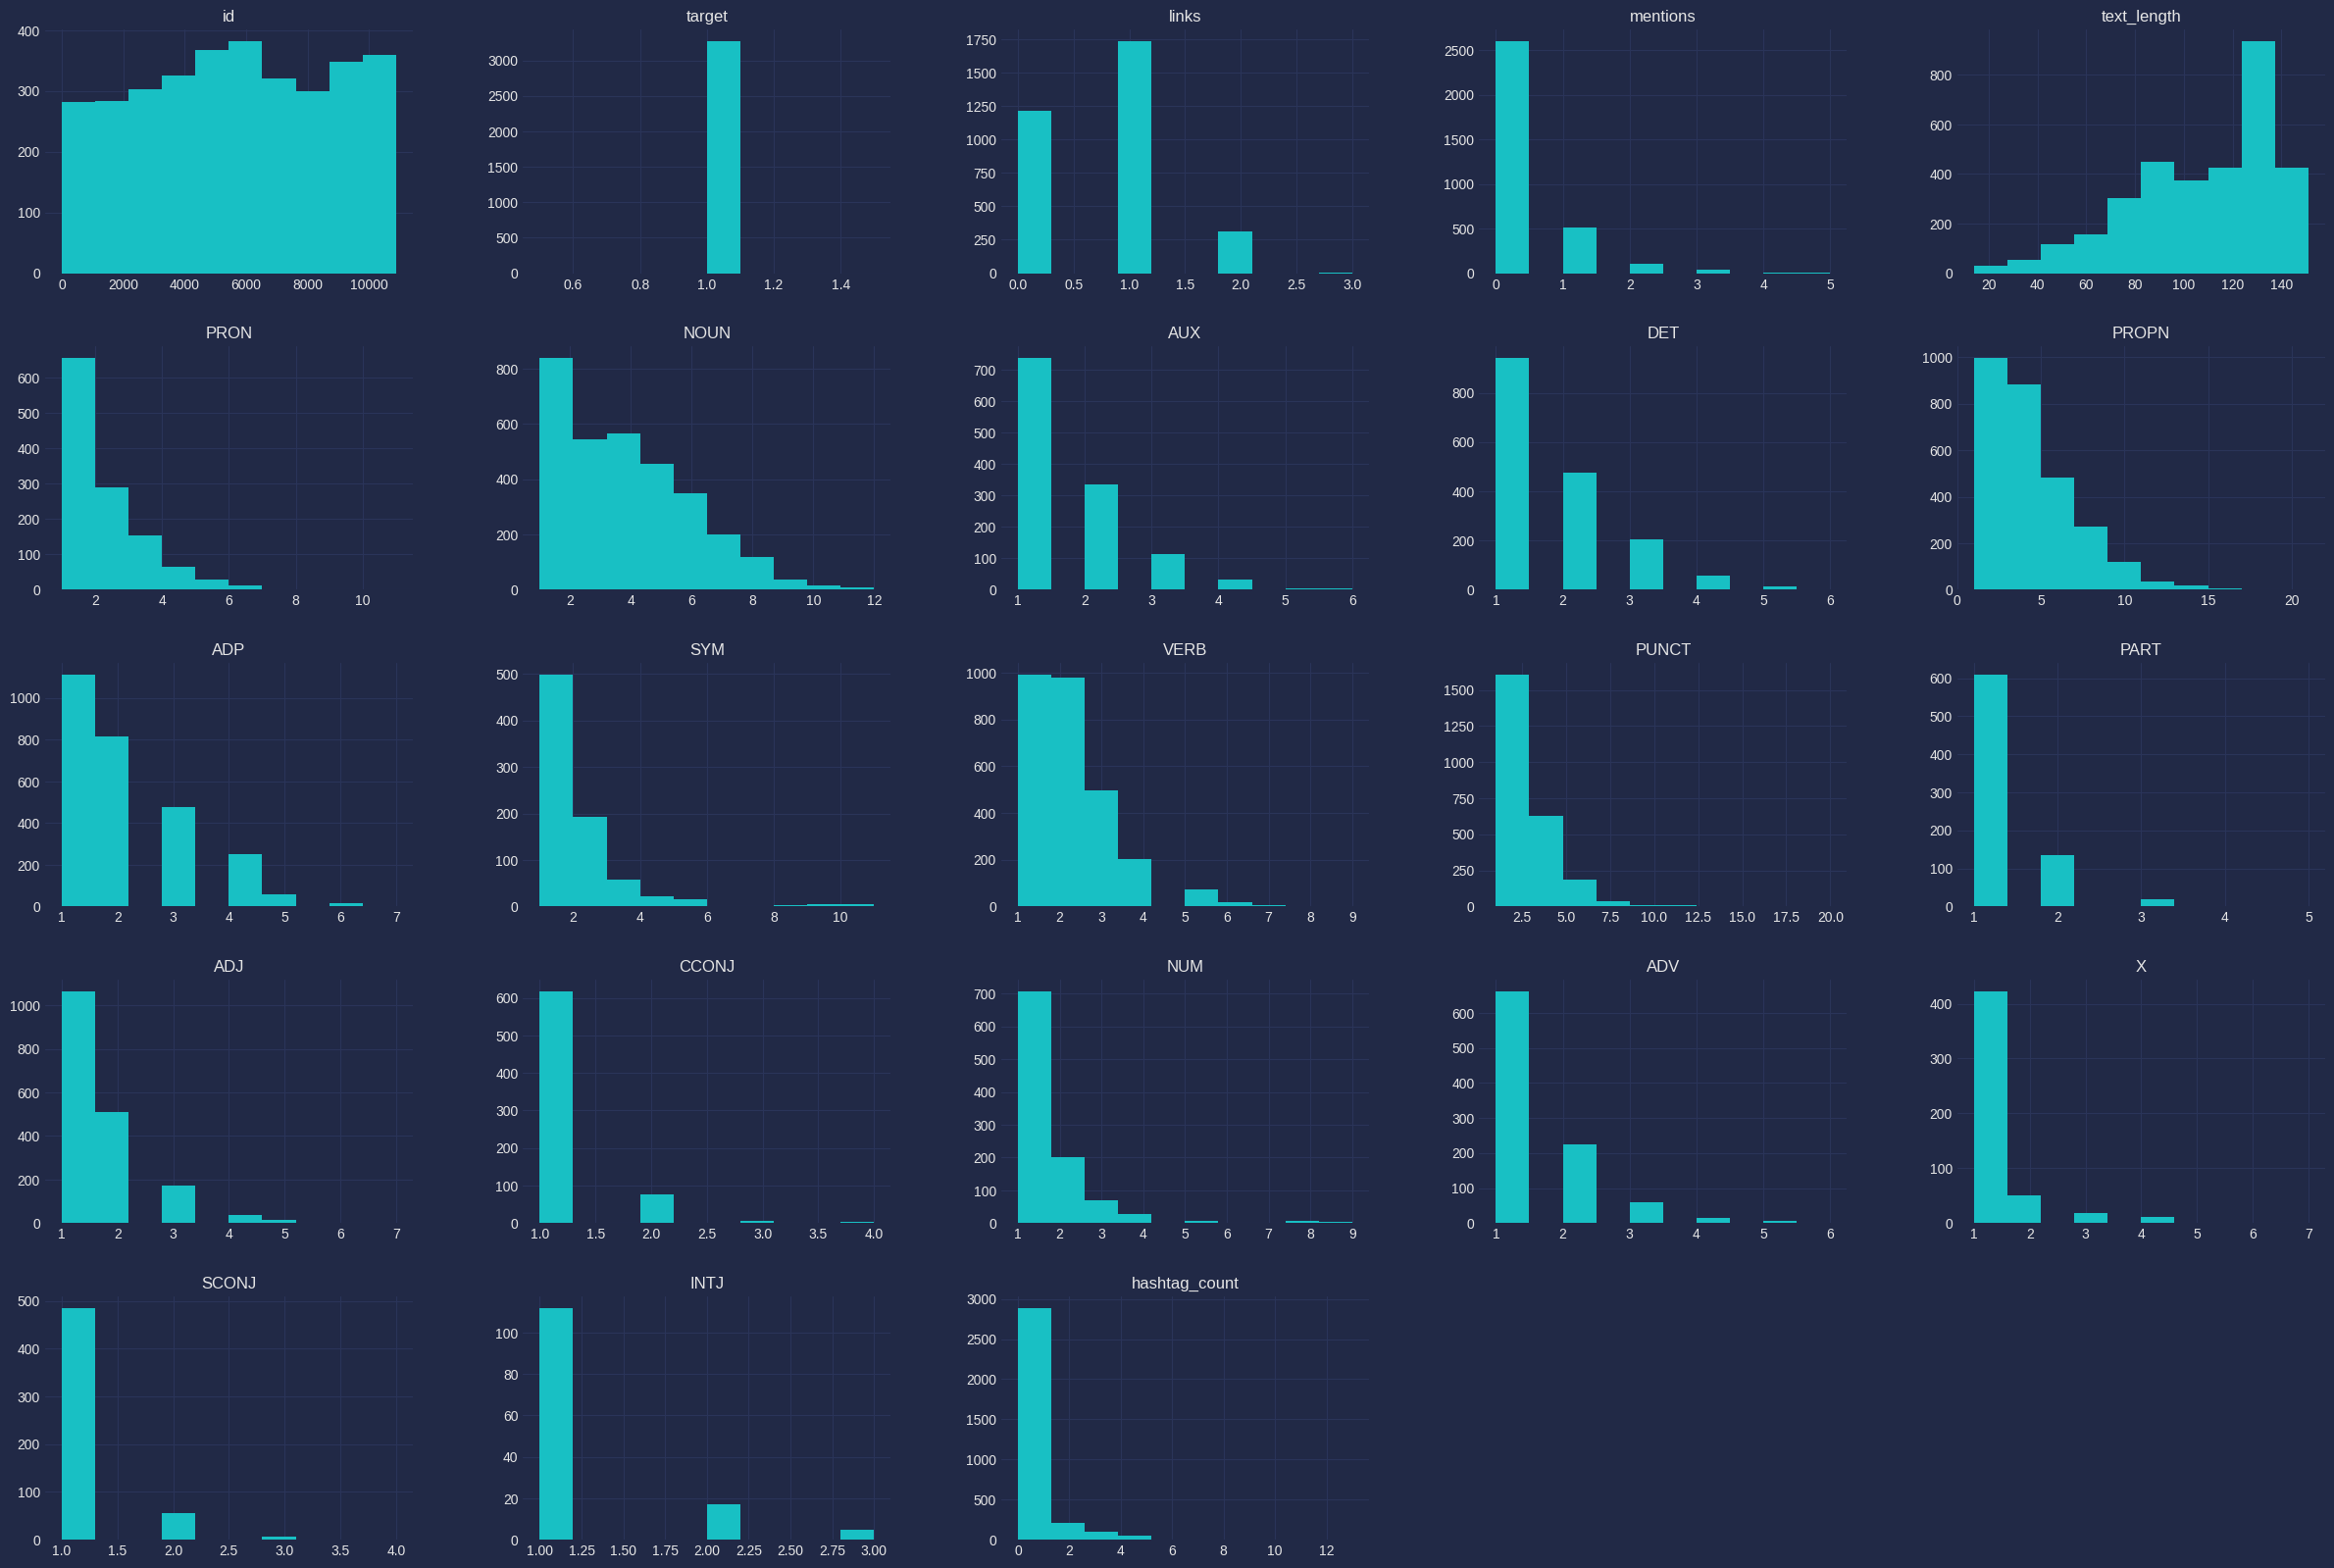

In [157]:
just_real = train[train['target'] == 1]

just_real.hist(figsize=(30,20))

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'links'}>,
        <Axes: title={'center': 'mentions'}>,
        <Axes: title={'center': 'text_length'}>],
       [<Axes: title={'center': 'PRON'}>,
        <Axes: title={'center': 'NOUN'}>,
        <Axes: title={'center': 'AUX'}>, <Axes: title={'center': 'DET'}>,
        <Axes: title={'center': 'PROPN'}>],
       [<Axes: title={'center': 'ADP'}>, <Axes: title={'center': 'SYM'}>,
        <Axes: title={'center': 'VERB'}>,
        <Axes: title={'center': 'PUNCT'}>,
        <Axes: title={'center': 'PART'}>],
       [<Axes: title={'center': 'ADJ'}>,
        <Axes: title={'center': 'CCONJ'}>,
        <Axes: title={'center': 'NUM'}>, <Axes: title={'center': 'ADV'}>,
        <Axes: title={'center': 'X'}>],
       [<Axes: title={'center': 'SCONJ'}>,
        <Axes: title={'center': 'INTJ'}>,
        <Axes: title={'center': 'hashtag_count'}>, <Axes: >, <Axes: >]],
      dtype=objec

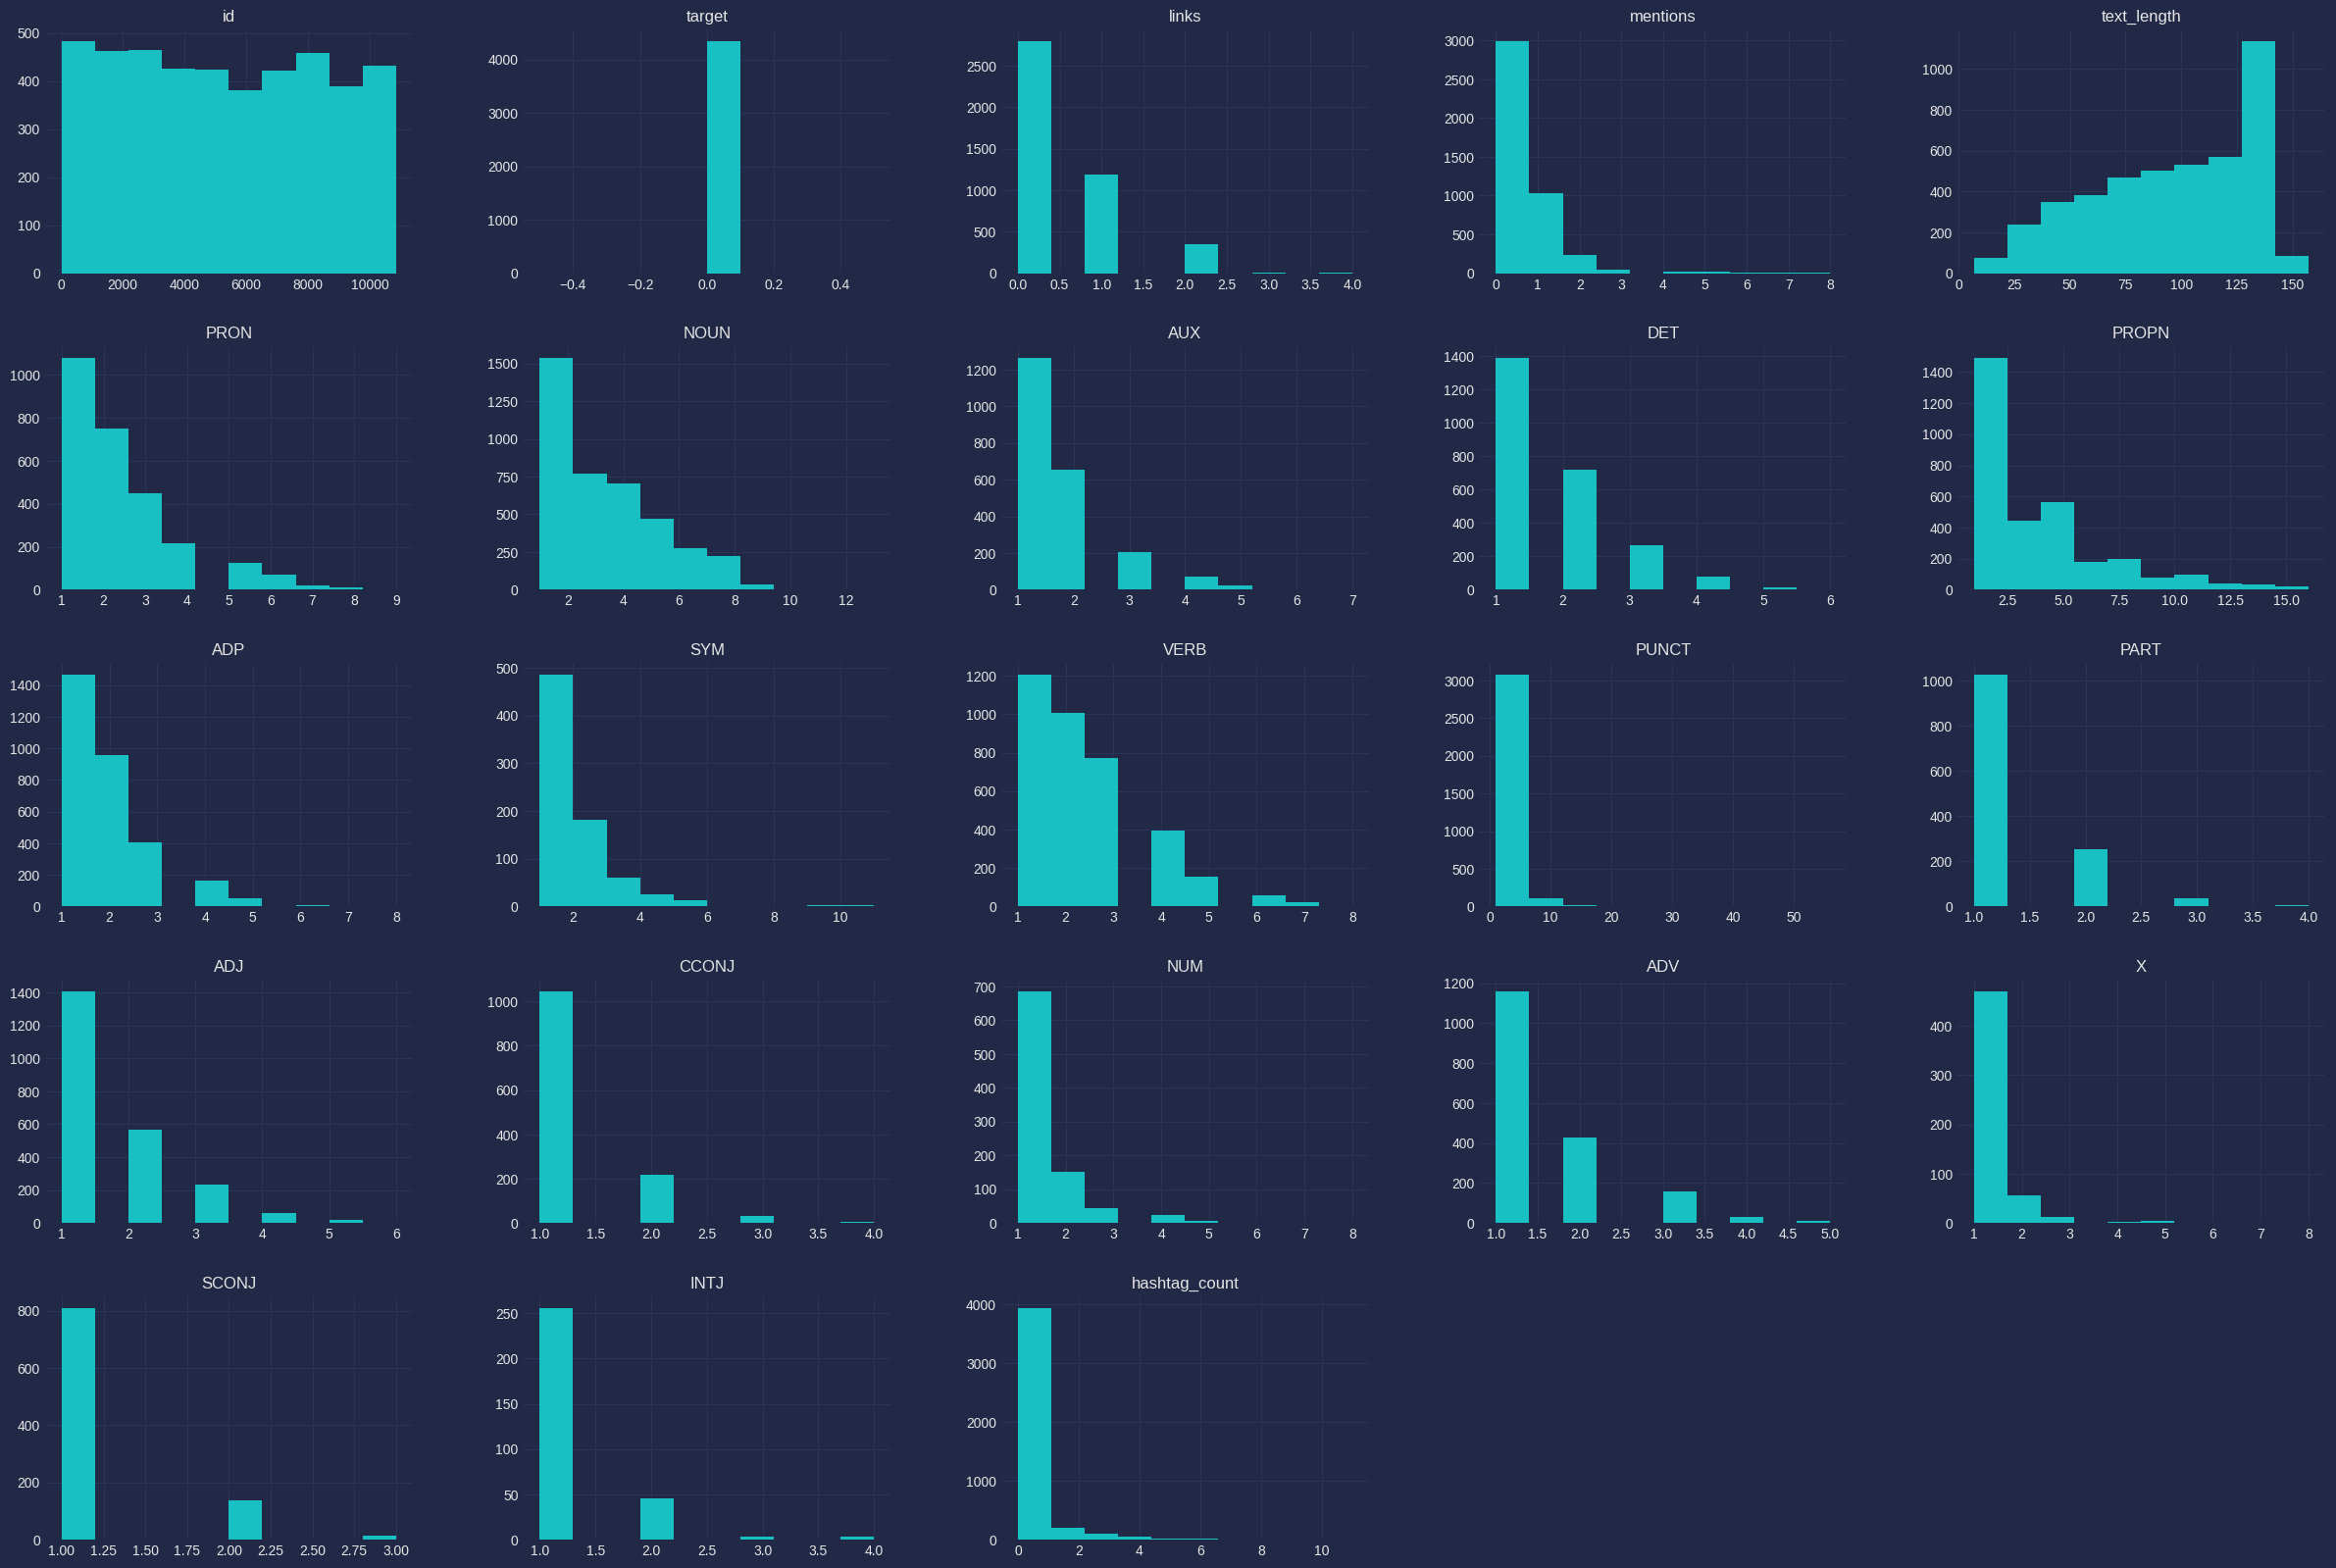

In [158]:
just_fake = train[train['target'] == 0]

just_fake.hist(figsize=(30,20))

So just looking at the visualizations here, it is very hard, for the human eye at least to see any really clear differences between real and fake tweets. Therefore finding the indicators might prove hard. I suspect I might need a somewhat complex neural network to have the descriptive power required to differentiate between the real and fake ones

In [159]:
train.drop(['hashtags'], axis=1, inplace=True)
train.head()

,id,keyword,location,text,target,links,mentions,text_length,PRON,NOUN,AUX,DET,PROPN,ADP,SYM,VERB,PUNCT,PART,ADJ,CCONJ,NUM,ADV,X,SCONJ,INTJ,hashtag_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,0,0,69,4.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0,38,NaN,2.0,NaN,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,0,133,NaN,7.0,3.0,2.0,NaN,3.0,NaN,4.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0,0,65,NaN,4.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,0,88,NaN,6.0,1.0,2.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2


In [160]:
train['keyword'].nunique()

221

In [161]:
train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
harm                     41
body%20bags              41
outbreak                 40
evacuate                 40
fear                     40
collided                 40
siren                    40
twister                  40
windstorm                40
sinkhole                 39
sunk                     39
hellfire                 39
weapon                   39
weapons                  39
famine                   39
explosion                39
whirlwind                39
earthquake               39
derailment               39
wreckage                 39
collision                39
flames                   39
wrecked                  39
oil%20spill              38
flooding                 38
deaths                   38
derailed                 38
thunder                  38
ambulance                38
drowned                  38
explode     

In [162]:
## The keyword is probably not a significant data point... I however have a function for turning it in to a nominal value so why not...

from sklearn.preprocessing import OrdinalEncoder

def nominalize(column, data):
    # Disable the SettingWithCopyWarning, since I TOTALLY know what I am doing and will never make a mistake because that is for n00bs
    pd.options.mode.chained_assignment = None
    # Get unique values
    unique_values = data[column].unique()
    # Replace missing values with a placeholder value
    data[column].fillna('missing', inplace=True)
    # Define encoder variable
    oenc = OrdinalEncoder(categories=[unique_values], dtype=int, handle_unknown='use_encoded_value', unknown_value=-1)
    # Replace column values with identifier numbers
    data[column] = oenc.fit_transform(data[[column]]) + 1   
    # Rename the column so that it's easier to understand
    new_name = column + "_Nominal_ID"
    data.rename(columns={column: new_name}, inplace=True)

In [164]:
nominalize('keyword', train)


In [165]:
train.head()

,id,keyword_Nominal_ID,location,text,target,links,mentions,text_length,PRON,NOUN,AUX,DET,PROPN,ADP,SYM,VERB,PUNCT,PART,ADJ,CCONJ,NUM,ADV,X,SCONJ,INTJ,hashtag_count
0,1,1,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,0,0,69,4.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4,1,NaN,Forest fire near La Ronge Sask. Canada,1,0,0,38,NaN,2.0,NaN,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,5,1,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,0,133,NaN,7.0,3.0,2.0,NaN,3.0,NaN,4.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0
3,6,1,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0,0,65,NaN,4.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
4,7,1,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,0,88,NaN,6.0,1.0,2.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2


In [166]:
train['keyword_Nominal_ID'].nunique()

222

In [167]:
test = pd.read_csv("test.csv")
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Let's make the same kind of modifications to our test-set


In [168]:

test['hashtags'] = test['text'].apply(find_tags)
test['links'] = test['text'].apply(find_links)
test['mentions'] = test['text'].apply(find_mentions)
test['text_length'] = test['text'].apply(lambda x: len(x))
test['links'] = test['links'].apply(turn_to_count)
test['mentions'] = test['mentions'].apply(turn_to_count)


tag_list = [pos_tags(text) for text in test['text']]

agregate_list = []
for i in tag_list:
    agregate_list.append(Counter(i))

agregate_list = [dict(counter_list) for counter_list in agregate_list]

agregate_df = pd.DataFrame(agregate_list)


test = pd.concat([test, agregate_df], axis=1)

test.drop(['SPACE'], axis=1, inplace=True)

test['hashtag_count'] = test['hashtags'].apply(turn_to_count)
test.drop(['hashtags'], axis=1, inplace=True)


nominalize('keyword', test)



ValueError: There are missing values in features [0]. For OrdinalEncoder to encode missing values with dtype: <class 'int'>, set encoded_missing_value to a non-nan value, or set dtype to a float

In [169]:
# I do not know why running this again fixes the above issue...
nominalize('keyword', test)


In [171]:
# do the same for locations
nominalize('location', train)


In [173]:
nominalize('location', test)

In [174]:
train.head()

,id,keyword_Nominal_ID,location_Nominal_ID,text,target,links,mentions,text_length,PRON,NOUN,AUX,DET,PROPN,ADP,SYM,VERB,PUNCT,PART,ADJ,CCONJ,NUM,ADV,X,SCONJ,INTJ,hashtag_count
0,1,1,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,0,0,69,4.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4,1,1,Forest fire near La Ronge Sask. Canada,1,0,0,38,NaN,2.0,NaN,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,5,1,1,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,0,133,NaN,7.0,3.0,2.0,NaN,3.0,NaN,4.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0
3,6,1,1,"13,000 people receive #wildfires evacuation orders in California",1,0,0,65,NaN,4.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
4,7,1,1,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,0,88,NaN,6.0,1.0,2.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2


In [178]:
## drops the text itself because you can't use it to train...


test.drop(['text'], axis=1, inplace=True)
train.drop(['text'], axis=1, inplace=True)


KeyError: "['text'] not found in axis"

In [180]:
# The columns re in a different order. This will not work so we need to reorder them... I will just use an alphabetic order

test = test.sort_index(axis=1)
train = train.sort_index(axis=1)

In [181]:
test.head()

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X,hashtag_count,id,keyword_Nominal_ID,links,location_Nominal_ID,mentions,text_length
0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,0,1,0,1,0,34
1,2.0,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,2.0,NaN,1.0,2.0,NaN,1,2,1,0,1,0,64
2,NaN,2.0,NaN,2.0,NaN,2.0,NaN,5.0,NaN,1.0,4.0,1.0,2.0,NaN,NaN,3.0,NaN,0,3,1,0,1,0,96
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,2,9,1,0,1,0,40
4,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,0,11,1,0,1,0,45


In [182]:
train.head()


,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X,hashtag_count,id,keyword_Nominal_ID,links,location_Nominal_ID,mentions,target,text_length
0,NaN,1.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,4.0,2.0,NaN,NaN,1.0,1.0,NaN,1,1,1,0,1,0,1,69
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,0,4,1,0,1,0,1,38
2,1.0,3.0,NaN,3.0,1.0,2.0,NaN,7.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,4.0,NaN,0,5,1,0,1,0,1,133
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1,6,1,0,1,0,1,65
4,NaN,4.0,1.0,1.0,NaN,2.0,NaN,6.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,2,7,1,0,1,0,1,88


In [185]:
## MODEL STUFF

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test


model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

test_ids = X_test['id']
predictions_df = pd.DataFrame({'id': test_ids, 'target': y_pred})

print(predictions_df.head())

predictions_df.to_csv('predictions.csv', index=False)

   id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1


This worked... "OK", but we'll see if we can improve on it.

In [208]:
train.fillna(value=0, inplace=True, axis=None)
test.fillna(value=0, inplace=True, axis=None)

In [211]:
train.isna().any()

ADJ                    False
ADP                    False
ADV                    False
AUX                    False
CCONJ                  False
DET                    False
INTJ                   False
NOUN                   False
NUM                    False
PART                   False
PRON                   False
PROPN                  False
PUNCT                  False
SCONJ                  False
SYM                    False
VERB                   False
X                      False
hashtag_count          False
id                     False
keyword_Nominal_ID     False
links                  False
location_Nominal_ID    False
mentions               False
target                 False
text_length            False
dtype: bool

In [243]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [213]:
X_train = train.drop(columns=['target'])
y_train = train['target']

In [214]:
X_test = test

In [215]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [260]:
model = tf.keras.Sequential([
    Dense(2048, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5), 
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [261]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [262]:
model.fit(X_train_scaled, y_train, epochs=30, batch_size=32)

Epoch 1/30


238/238 [==============================] - 3s 12ms/step - loss: 0.6461 - accuracy: 0.6465
Epoch 2/30
238/238 [==============================] - 3s 12ms/step - loss: 0.6118 - accuracy: 0.6892
Epoch 3/30
238/238 [==============================] - 3s 12ms/step - loss: 0.6028 - accuracy: 0.7004
Epoch 4/30
238/238 [==============================] - 3s 12ms/step - loss: 0.5887 - accuracy: 0.7101
Epoch 5/30
238/238 [==============================] - 3s 12ms/step - loss: 0.5842 - accuracy: 0.7084
Epoch 6/30
238/238 [==============================] - 3s 12ms/step - loss: 0.5844 - accuracy: 0.7113
Epoch 7/30
238/238 [==============================] - 3s 12ms/step - loss: 0.5742 - accuracy: 0.7173
Epoch 8/30
238/238 [==============================] - 3s 12ms/step - loss: 0.5728 - accuracy: 0.7155
Epoch 9/30
238/238 [==============================] - 3s 12ms/step - loss: 0.5691 - accuracy: 0.7221
Epoch 10/30
238/238 [==============================] - 3s 12ms/step - loss: 0.5643 - accuracy: 0.7230


In [263]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(np.int)  # Convert probabilities to binary predictions




  1/102 [..............................] - ETA: 3s

102/102 [==============================] - 0s 1ms/step


/tmp/ipykernel_2352678/3414351618.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = (y_pred_probs > 0.5).astype(np.int)  # Convert probabilities to binary predictions


In [264]:
predictions_df = pd.DataFrame({'id': test_ids, 'target': y_pred.flatten()}) 


In [265]:
print(predictions_df.head())

   id  target
0   0       0
1   2       0
2   3       0
3   9       0
4  11       0


In [266]:
predictions_df.nunique()

id        3263
target       2
dtype: int64

In [267]:
predictions_df.to_csv('predictions2.csv', index=False)

![Entry Screenshot](nlp-disasters.png)